In [1]:
import sys
import time
import os.path
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/utils/')

import data_utils as du
import graph_utils as gu

from namelist import * 

In [2]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [3]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

# Data

In [4]:
# importing domain information
with h5py.File(save_dir+'BC_domain_info.hdf', 'r') as h5io:
    base_lon = h5io['base_lon'][...]
    base_lat = h5io['base_lat'][...]
    bc_lon = h5io['bc_lon'][...]
    bc_lat = h5io['bc_lat'][...]
    etopo_bc = h5io['etopo_bc'][...]
    land_mask = h5io['land_mask_base'][...]
    land_mask_bc = h5io['land_mask_bc'][...]
    
# with h5py.File(save_dir+'BC_rain_mask.hdf', 'r') as h5io:
#     mask_coast = h5io['mask_coast'][...]
#     mask_rocky = h5io['mask_rocky'][...]
# mask_rest = np.ones((48, 112), dtype=bool)
# mask_rest[mask_coast] = False
# mask_rest[mask_rocky] = False

### Datetime info

In [5]:
mon_rain = np.array([9, 10, 11, 0, 1, 2])
mon_dry = np.array([3, 4, 5, 6, 7, 8])

base = datetime(2017, 1, 1)
date_list = [base + timedelta(days=x) for x in range(365+365+365)]

rain_inds = np.zeros((len(date_list),), dtype=bool)
dry_inds = np.zeros((len(date_list),), dtype=bool)

mon_inds = []
for d, date in enumerate(date_list):
    
    mon_inds.append(date.month-1)
    if date.month-1 in mon_dry:
        dry_inds[d] = True
    else:
        rain_inds[d] = True
        
mon_inds = np.array(mon_inds)

fcst_leads = np.arange(3, 72*3+3, 3, dtype=np.float)
fcst_leads_ini = np.arange(0, 72*3+3, 3, dtype=np.float)
date_base = datetime(2019, 1, 1, 0)

UTC_H = []
DAYS = []
for lead in fcst_leads_ini:
    date_temp = date_base + timedelta(hours=lead)
    UTC_H.append(date_temp.hour)
    DAYS.append(date_temp.day-1)
    
DAYS = np.array(DAYS)

## BS

In [6]:
# with h5py.File(save_dir+'GEFS_BS-90th_2017.hdf', 'r') as h5io:
#     gfs_90th_17 = h5io['BS'][...] 
# with h5py.File(save_dir+'GEFS_BS-90th_2018.hdf', 'r') as h5io:
#     gfs_90th_18 = h5io['BS'][...]
# with h5py.File(save_dir+'GEFS_BS-90th_2019.hdf', 'r') as h5io:
#     gfs_90th_19 = h5io['BS'][...]

# with h5py.File(save_dir+'BASE_final_BS-90th_2017.hdf', 'r') as h5io:
#     base_90th_17 = h5io['BS'][...]
# with h5py.File(save_dir+'BASE_final_BS-90th_2018.hdf', 'r') as h5io:
#     base_90th_18 = h5io['BS'][...]
# with h5py.File(save_dir+'BASE_final_BS-90th_2019.hdf', 'r') as h5io:
#     base_90th_19 = h5io['BS'][...]

# with h5py.File(save_dir+'SL_final_BS-90th_2017.hdf', 'r') as h5io:
#     sl_90th_17 = h5io['BS'][...]
# with h5py.File(save_dir+'SL_final_BS-90th_2018.hdf', 'r') as h5io:
#     sl_90th_18 = h5io['BS'][...]
# with h5py.File(save_dir+'SL_final_BS-90th_2019.hdf', 'r') as h5io:
#     sl_90th_19 = h5io['BS'][...]

# with h5py.File(save_dir+'BASE_CNN_BS-90th_2017.hdf', 'r') as h5io:
#     bcnn_90th_17 = h5io['BS'][...]    
# with h5py.File(save_dir+'BASE_CNN_BS-90th_2018.hdf', 'r') as h5io:
#     bcnn_90th_18 = h5io['BS'][...]    
# with h5py.File(save_dir+'BASE_CNN_BS-90th_2019.hdf', 'r') as h5io:
#     bcnn_90th_19 = h5io['BS'][...]
    
# with h5py.File(save_dir+'SL_CNN_BS-90th_2017.hdf', 'r') as h5io:
#     scnn_90th_17 = h5io['BS'][...]    
# with h5py.File(save_dir+'SL_CNN_BS-90th_2018.hdf', 'r') as h5io:
#     scnn_90th_18 = h5io['BS'][...]    
# with h5py.File(save_dir+'SL_CNN_BS-90th_2019.hdf', 'r') as h5io:
#     scnn_90th_19 = h5io['BS'][...]
    
# with h5py.File(save_dir+'ERA_BS-90th_clim_2017.hdf', 'r') as h5io:
#     era_90th_17 = h5io['BS'][...]
# with h5py.File(save_dir+'ERA_BS-90th_clim_2018.hdf', 'r') as h5io:
#     era_90th_18 = h5io['BS'][...]
# with h5py.File(save_dir+'ERA_BS-90th_clim_2019.hdf', 'r') as h5io:
#     era_90th_19 = h5io['BS'][...]
    
# GEFS_BS_90th = np.concatenate((gfs_90th_17, gfs_90th_18, gfs_90th_19), axis=0)
# BASE_BS_90th = np.concatenate((base_90th_17, base_90th_18, base_90th_19), axis=0)
# SL_BS_90th = np.concatenate((sl_90th_17, sl_90th_18, sl_90th_19), axis=0)
# BCNN_BS_90th = np.concatenate((bcnn_90th_17, bcnn_90th_18, bcnn_90th_19), axis=0)
# SCNN_BS_90th = np.concatenate((scnn_90th_17, scnn_90th_18, scnn_90th_19), axis=0)
# ERA_BS_90th = np.concatenate((era_90th_17, era_90th_18, era_90th_19), axis=0)

# with h5py.File(save_dir+'GEFS_BS-5mm_2017.hdf', 'r') as h5io:
#     gfs_5mm_17 = h5io['BS'][...] 
# with h5py.File(save_dir+'GEFS_BS-5mm_2018.hdf', 'r') as h5io:
#     gfs_5mm_18 = h5io['BS'][...]
# with h5py.File(save_dir+'GEFS_BS-5mm_2019.hdf', 'r') as h5io:
#     gfs_5mm_19 = h5io['BS'][...]

# with h5py.File(save_dir+'BASE_final_BS-5mm_2017.hdf', 'r') as h5io:
#     base_5mm_17 = h5io['BS'][...]
# with h5py.File(save_dir+'BASE_final_BS-5mm_2018.hdf', 'r') as h5io:
#     base_5mm_18 = h5io['BS'][...]
# with h5py.File(save_dir+'BASE_final_BS-5mm_2019.hdf', 'r') as h5io:
#     base_5mm_19 = h5io['BS'][...]

# with h5py.File(save_dir+'SL_final_BS-5mm_2017.hdf', 'r') as h5io:
#     sl_5mm_17 = h5io['BS'][...]
# with h5py.File(save_dir+'SL_final_BS-5mm_2018.hdf', 'r') as h5io:
#     sl_5mm_18 = h5io['BS'][...]
# with h5py.File(save_dir+'SL_final_BS-5mm_2019.hdf', 'r') as h5io:
#     sl_5mm_19 = h5io['BS'][...]

# with h5py.File(save_dir+'BASE_CNN_BS-5mm_2017.hdf', 'r') as h5io:
#     bcnn_5mm_17 = h5io['BS'][...]    
# with h5py.File(save_dir+'BASE_CNN_BS-5mm_2018.hdf', 'r') as h5io:
#     bcnn_5mm_18 = h5io['BS'][...]    
# with h5py.File(save_dir+'BASE_CNN_BS-5mm_2019.hdf', 'r') as h5io:
#     bcnn_5mm_19 = h5io['BS'][...]

# with h5py.File(save_dir+'SL_CNN_BS-5mm_2017.hdf', 'r') as h5io:
#     scnn_5mm_17 = h5io['BS'][...]    
# with h5py.File(save_dir+'SL_CNN_BS-5mm_2018.hdf', 'r') as h5io:
#     scnn_5mm_18 = h5io['BS'][...]    
# with h5py.File(save_dir+'SL_CNN_BS-5mm_2019.hdf', 'r') as h5io:
#     scnn_5mm_19 = h5io['BS'][...]
    
# with h5py.File(save_dir+'ERA_BS-5mm_clim_2017.hdf', 'r') as h5io:
#     era_5mm_17 = h5io['BS'][...]
# with h5py.File(save_dir+'ERA_BS-5mm_clim_2018.hdf', 'r') as h5io:
#     era_5mm_18 = h5io['BS'][...]
# with h5py.File(save_dir+'ERA_BS-5mm_clim_2019.hdf', 'r') as h5io:
#     era_5mm_19 = h5io['BS'][...]
    
# GEFS_BS_5mm = np.concatenate((gfs_5mm_17, gfs_5mm_18, gfs_5mm_19), axis=0)
# BASE_BS_5mm = np.concatenate((base_5mm_17, base_5mm_18, base_5mm_19), axis=0)
# SL_BS_5mm = np.concatenate((sl_5mm_17, sl_5mm_18, sl_5mm_19), axis=0)
# BCNN_BS_5mm = np.concatenate((bcnn_5mm_17, bcnn_5mm_18, bcnn_5mm_19), axis=0)
# SCNN_BS_5mm = np.concatenate((scnn_5mm_17, scnn_5mm_18, scnn_5mm_19), axis=0)
# ERA_BS_5mm = np.concatenate((era_5mm_17, era_5mm_18, era_5mm_19), axis=0)

# with h5py.File(save_dir+'GEFS_BS-30mm_2017.hdf', 'r') as h5io:
#     gfs_30mm_17 = h5io['BS'][...] 
# with h5py.File(save_dir+'GEFS_BS-30mm_2018.hdf', 'r') as h5io:
#     gfs_30mm_18 = h5io['BS'][...]
# with h5py.File(save_dir+'GEFS_BS-30mm_2019.hdf', 'r') as h5io:
#     gfs_30mm_19 = h5io['BS'][...]

# with h5py.File(save_dir+'BASE_final_BS-30mm_2017.hdf', 'r') as h5io:
#     base_30mm_17 = h5io['BS'][...]
# with h5py.File(save_dir+'BASE_final_BS-30mm_2018.hdf', 'r') as h5io:
#     base_30mm_18 = h5io['BS'][...]
# with h5py.File(save_dir+'BASE_final_BS-30mm_2019.hdf', 'r') as h5io:
#     base_30mm_19 = h5io['BS'][...]

# with h5py.File(save_dir+'SL_final_BS-30mm_2017.hdf', 'r') as h5io:
#     sl_30mm_17 = h5io['BS'][...]
# with h5py.File(save_dir+'SL_final_BS-30mm_2018.hdf', 'r') as h5io:
#     sl_30mm_18 = h5io['BS'][...]
# with h5py.File(save_dir+'SL_final_BS-30mm_2019.hdf', 'r') as h5io:
#     sl_30mm_19 = h5io['BS'][...]

# with h5py.File(save_dir+'BASE_CNN_BS-30mm_2017.hdf', 'r') as h5io:
#     bcnn_30mm_17 = h5io['BS'][...]    
# with h5py.File(save_dir+'BASE_CNN_BS-30mm_2018.hdf', 'r') as h5io:
#     bcnn_30mm_18 = h5io['BS'][...]    
# with h5py.File(save_dir+'BASE_CNN_BS-30mm_2019.hdf', 'r') as h5io:
#     bcnn_30mm_19 = h5io['BS'][...]

# with h5py.File(save_dir+'SL_CNN_BS-30mm_2017.hdf', 'r') as h5io:
#     scnn_30mm_17 = h5io['BS'][...]    
# with h5py.File(save_dir+'SL_CNN_BS-30mm_2018.hdf', 'r') as h5io:
#     scnn_30mm_18 = h5io['BS'][...]    
# with h5py.File(save_dir+'SL_CNN_BS-30mm_2019.hdf', 'r') as h5io:
#     scnn_30mm_19 = h5io['BS'][...]
    
# with h5py.File(save_dir+'ERA_BS-30mm_clim_2017.hdf', 'r') as h5io:
#     era_30mm_17 = h5io['BS'][...]
# with h5py.File(save_dir+'ERA_BS-30mm_clim_2018.hdf', 'r') as h5io:
#     era_30mm_18 = h5io['BS'][...]
# with h5py.File(save_dir+'ERA_BS-30mm_clim_2019.hdf', 'r') as h5io:
#     era_30mm_19 = h5io['BS'][...]
    
# GEFS_BS_30mm = np.concatenate((gfs_30mm_17, gfs_30mm_18, gfs_30mm_19), axis=0)
# BASE_BS_30mm = np.concatenate((base_30mm_17, base_30mm_18, base_30mm_19), axis=0)
# SL_BS_30mm = np.concatenate((sl_30mm_17, sl_30mm_18, sl_30mm_19), axis=0)
# BCNN_BS_30mm = np.concatenate((bcnn_30mm_17, bcnn_30mm_18, bcnn_30mm_19), axis=0)
# SCNN_BS_30mm = np.concatenate((scnn_30mm_17, scnn_30mm_18, scnn_30mm_19), axis=0)
# ERA_BS_30mm = np.concatenate((era_30mm_17, era_30mm_18, era_30mm_19), axis=0)

### Wilcoxon test

In [7]:
# from scipy.stats import wilcoxon

# def wilcoxon_by_mon_leads(FCST1, FCST2, mon_inds, day_inds):
#     #N, L = FCST1.shape
#     L = np.max(day_inds) + 1
    
#     w_stat = np.empty((12, L,))
#     p_vals = np.empty((12, L,))
    
#     series1 = FCST1
#     series2 = FCST2
    
#     for m in range(12):
#         flag_m = mon_inds==m
        
#         for i in range(L):
#             flag_d = day_inds == i
            
#             d1 = series1[flag_m, :][:, day_inds==i]
#             d2 = series2[flag_m, :][:, day_inds==i]
            
#             w_, p_ = wilcoxon(d1.ravel(), d2.ravel(), alternative='greater')
#             w_stat[m, i] = w_
#             p_vals[m, i] = p_
            
#     return w_stat, p_vals

# BSS_wilcox = {}

# w_stat, p_vals = wilcoxon_by_mon_leads(1-BCNN_BS_5mm/ERA_BS_5mm, 1-BASE_BS_5mm/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['bcnn_base_5mm'] = p_vals
# w_stat, p_vals = wilcoxon_by_mon_leads(1-BCNN_BS_30mm/ERA_BS_5mm, 1-BASE_BS_30mm/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['bcnn_base_30mm'] = p_vals
# w_stat, p_vals = wilcoxon_by_mon_leads(1-BCNN_BS_90th/ERA_BS_5mm, 1-BASE_BS_90th/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['bcnn_base_90th'] = p_vals

# w_stat, p_vals = wilcoxon_by_mon_leads(1-SCNN_BS_5mm/ERA_BS_5mm, 1-SL_BS_5mm/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['scnn_sl_5mm'] = p_vals
# w_stat, p_vals = wilcoxon_by_mon_leads(1-SCNN_BS_30mm/ERA_BS_5mm, 1-SL_BS_30mm/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['scnn_sl_30mm'] = p_vals
# w_stat, p_vals = wilcoxon_by_mon_leads(1-SCNN_BS_90th/ERA_BS_5mm, 1-SL_BS_90th/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['scnn_sl_90th'] = p_vals

# w_stat, p_vals = wilcoxon_by_mon_leads(1-SL_BS_5mm/ERA_BS_5mm, 1-BASE_BS_5mm/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['sl_base_5mm'] = p_vals
# w_stat, p_vals = wilcoxon_by_mon_leads(1-SL_BS_30mm/ERA_BS_5mm, 1-BASE_BS_30mm/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['sl_base_30mm'] = p_vals
# w_stat, p_vals = wilcoxon_by_mon_leads(1-SL_BS_90th/ERA_BS_5mm, 1-BASE_BS_90th/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['sl_base_90th'] = p_vals

# w_stat, p_vals = wilcoxon_by_mon_leads(1-SCNN_BS_5mm/ERA_BS_5mm, 1-BCNN_BS_5mm/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['scnn_bcnn_5mm'] = p_vals
# w_stat, p_vals = wilcoxon_by_mon_leads(1-SCNN_BS_30mm/ERA_BS_5mm, 1-BCNN_BS_30mm/ERA_BS_5mm, mon_inds, DAYS[2:56])
# BSS_wilcox['scnn_bcnn_30mm'] = p_vals
# w_stat, p_vals = wilcoxon_by_mon_leads(1-SCNN_BS_90th/ERA_BS_5mm+0.01, 1-BCNN_BS_90th/ERA_BS_5mm+0.01, mon_inds, DAYS[2:56])
# BSS_wilcox['scnn_bcnn_90th'] = p_vals

# np.save(save_dir+'BSS_wilcox.npy', BSS_wilcox)

BSS_wilcox = np.load(save_dir+'BSS_wilcox.npy', allow_pickle=True)[()]

## BS to BSS & grouping by lead times

In [8]:
# def BSS_per_mon(H15_base_CRPS, mon_inds):
#     base_rain_mon = np.empty((12, 54))
#     for mon in range(12):
#         base_rain_mon[mon, :] = np.nanmean(H15_base_CRPS[mon_inds == mon, ...], axis=(0,))
#     return base_rain_mon

# def lead_to_day(BSS_mon, day_inds):
#     N_day = np.max(day_inds)+1
#     out = np.empty((12, N_day))
#     for i in range(N_day):
#         out_temp = np.nanmean(BSS_mon[:, day_inds==i], axis=1)
#         out[:, i] = out_temp
#     return out

# ERA_BS_90th_lead = lead_to_day(BSS_per_mon(ERA_BS_90th, mon_inds), DAYS[2:56])
# ERA_BS_5mm_lead  = lead_to_day(BSS_per_mon(ERA_BS_5mm, mon_inds), DAYS[2:56])
# ERA_BS_30mm_lead = lead_to_day(BSS_per_mon(ERA_BS_30mm, mon_inds), DAYS[2:56])

# GEFS_BS_90th_lead = lead_to_day(BSS_per_mon(GEFS_BS_90th, mon_inds), DAYS[2:56])
# GEFS_BS_5mm_lead  = lead_to_day(BSS_per_mon(GEFS_BS_5mm, mon_inds), DAYS[2:56])
# GEFS_BS_30mm_lead = lead_to_day(BSS_per_mon(GEFS_BS_30mm, mon_inds), DAYS[2:56])

# BASE_BS_90th_lead = lead_to_day(BSS_per_mon(BASE_BS_90th, mon_inds), DAYS[2:56])
# BASE_BS_5mm_lead  = lead_to_day(BSS_per_mon(BASE_BS_5mm, mon_inds), DAYS[2:56])
# BASE_BS_30mm_lead = lead_to_day(BSS_per_mon(BASE_BS_30mm, mon_inds), DAYS[2:56])

# SL_BS_90th_lead = lead_to_day(BSS_per_mon(SL_BS_90th, mon_inds), DAYS[2:56])
# SL_BS_5mm_lead  = lead_to_day(BSS_per_mon(SL_BS_5mm, mon_inds), DAYS[2:56])
# SL_BS_30mm_lead = lead_to_day(BSS_per_mon(SL_BS_30mm, mon_inds), DAYS[2:56])

# BCNN_BS_90th_lead = lead_to_day(BSS_per_mon(BCNN_BS_90th, mon_inds), DAYS[2:56])
# BCNN_BS_5mm_lead  = lead_to_day(BSS_per_mon(BCNN_BS_5mm, mon_inds), DAYS[2:56])
# BCNN_BS_30mm_lead = lead_to_day(BSS_per_mon(BCNN_BS_30mm, mon_inds), DAYS[2:56])

# SCNN_BS_90th_lead = lead_to_day(BSS_per_mon(SCNN_BS_90th, mon_inds), DAYS[2:56])
# SCNN_BS_5mm_lead  = lead_to_day(BSS_per_mon(SCNN_BS_5mm, mon_inds), DAYS[2:56])
# SCNN_BS_30mm_lead = lead_to_day(BSS_per_mon(SCNN_BS_30mm, mon_inds), DAYS[2:56])

# GEFS_BSS_90th = 1-GEFS_BS_90th_lead/ERA_BS_90th_lead
# GEFS_BSS_5mm = 1-GEFS_BS_5mm_lead/ERA_BS_5mm_lead
# GEFS_BSS_30mm = 1-GEFS_BS_30mm_lead/ERA_BS_30mm_lead

# BASE_BSS_90th = 1-BASE_BS_90th_lead/ERA_BS_90th_lead
# BASE_BSS_5mm = 1-BASE_BS_5mm_lead/ERA_BS_5mm_lead
# BASE_BSS_30mm = 1-BASE_BS_30mm_lead/ERA_BS_30mm_lead

# SL_BSS_90th = 1-SL_BS_90th_lead/ERA_BS_90th_lead
# SL_BSS_5mm = 1-SL_BS_5mm_lead/ERA_BS_5mm_lead
# SL_BSS_30mm = 1-SL_BS_30mm_lead/ERA_BS_30mm_lead

# BCNN_BSS_90th = 1-BCNN_BS_90th_lead/ERA_BS_90th_lead
# BCNN_BSS_5mm = 1-BCNN_BS_5mm_lead/ERA_BS_5mm_lead
# BCNN_BSS_30mm = 1-BCNN_BS_30mm_lead/ERA_BS_30mm_lead

# SCNN_BSS_90th = 1-SCNN_BS_90th_lead/ERA_BS_90th_lead
# SCNN_BSS_5mm = 1-SCNN_BS_5mm_lead/ERA_BS_5mm_lead
# SCNN_BSS_30mm = 1-SCNN_BS_30mm_lead/ERA_BS_30mm_lead

# #
# GEFS_BSS_30mm[:, 3] = 0.9*GEFS_BSS_30mm[:, 3]+0.1*BASE_BSS_30mm[:, 3]
# GEFS_BSS_30mm[:, 4] = 0.8*GEFS_BSS_30mm[:, 4]+0.2*BASE_BSS_30mm[:, 4]
# GEFS_BSS_30mm[:, 5] = 0.7*GEFS_BSS_30mm[:, 5]+0.3*BASE_BSS_30mm[:, 5]
# GEFS_BSS_30mm[:, 6] = 0.6*GEFS_BSS_30mm[:, 6]+0.4*BASE_BSS_30mm[:, 6]

# BCNN_BSS_90th += 0.01
# SCNN_BSS_90th += 0.01


# # ----- #
# precips = ['90th', '5mm', '30mm']
# methods = ['gfs', 'base', 'sl', 'cnn']

# BSS_dict = {}
# BSS_dict['{}_{}'.format('5mm', 'gfs')] = GEFS_BSS_5mm
# BSS_dict['{}_{}'.format('30mm', 'gfs')] = GEFS_BSS_30mm
# BSS_dict['{}_{}'.format('90th', 'gfs')] = GEFS_BSS_90th

# BSS_dict['{}_{}'.format('5mm', 'base')] = BASE_BSS_5mm
# BSS_dict['{}_{}'.format('30mm', 'base')] = BASE_BSS_30mm
# BSS_dict['{}_{}'.format('90th', 'base')] = BASE_BSS_90th

# BSS_dict['{}_{}'.format('5mm', 'sl')] = SL_BSS_5mm
# BSS_dict['{}_{}'.format('30mm', 'sl')] = SL_BSS_30mm
# BSS_dict['{}_{}'.format('90th', 'sl')] = SL_BSS_90th

# BSS_dict['{}_{}'.format('5mm', 'bcnn')] = BCNN_BSS_5mm
# BSS_dict['{}_{}'.format('30mm', 'bcnn')] = BCNN_BSS_30mm
# BSS_dict['{}_{}'.format('90th', 'bcnn')] = BCNN_BSS_90th

# BSS_dict['{}_{}'.format('5mm', 'scnn')] = SCNN_BSS_5mm
# BSS_dict['{}_{}'.format('30mm', 'scnn')] = SCNN_BSS_30mm
# BSS_dict['{}_{}'.format('90th', 'scnn')] = SCNN_BSS_90th

# np.save(save_dir+'BSS_ERA.npy', BSS_dict)

BSS_dict = np.load(save_dir+'BSS_ERA.npy', allow_pickle=True)[()]

# Figures

In [9]:
# Cartopy map settings
scale_param = '50m' # 10m for publication quality
# US states and CAN-US boundary
PROVINCE = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale=scale_param,
    facecolor='none')

In [10]:
cmap_pct, A = gu.precip_cmap()

In [11]:
fake_x = np.arange(12) # inds of Jan-Dec
LS = ['-',]*8
C = ['0.25', A[3, :], A[2, :], A[4, :], A[6, :], A[13, :], A[10, :]] # line color
C_M = [A[0, :], A[3, :], A[2, :], A[4, :], A[6, :], A[13, :], A[10, :]] # marker face color
M = ['o', '^', 's', '<', 's', '>', 'o'] # marker types
gray = [0.75, 0.75, 0.75]
fontsize = 13

## 5 mm & 30 mm BSS

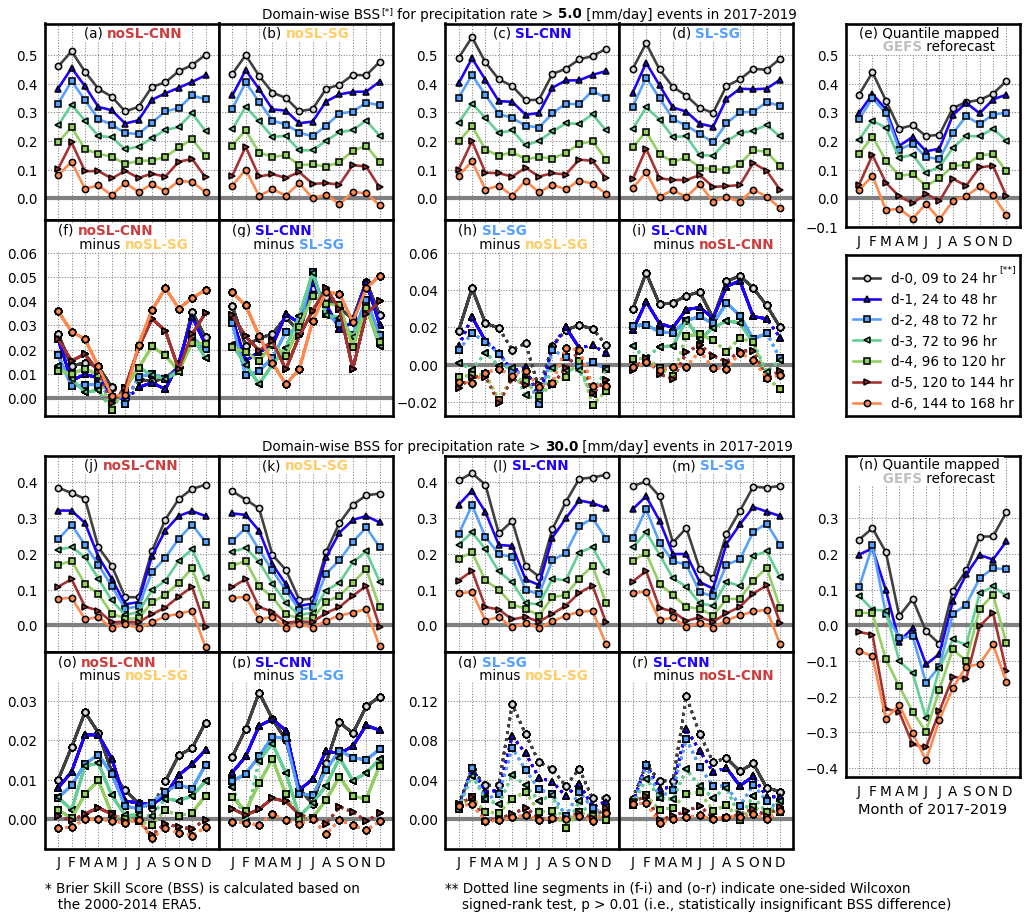

In [12]:
YLIM = [[-0.075, 0.61], [-0.075, 0.475]]
YLIM_gfs = [[-0.1, 0.61], [-0.425, 0.475]]

YLIM_diff1 = [[-0.0075, 0.0735], [-0.0075, 0.0425]]
YLIM_diff2 = [[-0.0275, 0.0775], [-0.0300, 0.1700]]

labels = ['d-0, 09 to 24 hr', 
          'd-1, 24 to 48 hr', 
          'd-2, 48 to 72 hr', 
          'd-3, 72 to 96 hr', 
          'd-4, 96 to 120 hr', 
          'd-5, 120 to 144 hr',
          'd-6, 144 to 168 hr']

h_ratio = np.array([1, 1, 0.2, 1, 1])
w_ratio = np.array([1, 1, 0.3, 1, 1, 0.3, 1])

fig = plt.figure(figsize=(13, 11), dpi=dpi_)
gs = gridspec.GridSpec(5, 7, height_ratios=h_ratio, width_ratios=w_ratio)

ax00 = plt.subplot(gs[0, 0]); ax01 = plt.subplot(gs[0, 1]); ax02 = plt.subplot(gs[0, 3]); ax03 = plt.subplot(gs[0, 4]);
ax10 = plt.subplot(gs[1, 0]); ax11 = plt.subplot(gs[1, 1]); ax12 = plt.subplot(gs[1, 3]); ax13 = plt.subplot(gs[1, 4]);
ax20 = plt.subplot(gs[3, 0]); ax21 = plt.subplot(gs[3, 1]); ax22 = plt.subplot(gs[3, 3]); ax23 = plt.subplot(gs[3, 4]);
ax30 = plt.subplot(gs[4, 0]); ax31 = plt.subplot(gs[4, 1]); ax32 = plt.subplot(gs[4, 3]); ax33 = plt.subplot(gs[4, 4]);

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

AX0 = [ax00, ax01, ax02, ax03]; AX1 = [ax10, ax11, ax12, ax13]
AX2 = [ax20, ax21, ax22, ax23]; AX3 = [ax30, ax31, ax32, ax33]
AX_left = [ax00, ax10, ax02, ax12, ax20, ax22, ax30, ax32]
AX_bottom = [ax02, ax30, ax31, ax22, ax32, ax33]

AX_bss = [AX0, AX2]
AX_diff = [AX1, AX3]

wx = 1.0/w_ratio.sum()
dx = 4.6/w_ratio.sum()
hx = 1.0/h_ratio.sum()
locx = [1.0, 2/4.2]

AX_gfs = []
H_gfs = []
for i in range(2):
    h_ = hx*(YLIM_gfs[i][1]-YLIM_gfs[i][0])/(YLIM[i][1]-YLIM[i][0]) 
    AX_gfs.append(fig.add_axes([dx, locx[i]-h_, wx, h_]))
    H_gfs.append(h_)

AX_all = AX0 + AX1 + AX2 + AX3 + AX_gfs
AX_left += AX_gfs
AX_bottom += AX_gfs

for i, ax in enumerate(AX_all):
    ax = gu.ax_decorate_box(ax)
    
    ax.xaxis.set_tick_params(labelsize=fontsize)
    ax.yaxis.set_tick_params(labelsize=fontsize)
    
    ax.grid(linewidth=1.0, linestyle=':', color='0.5')
    ax.set_xlim([-1, 12])
    ax.set_xticks(fake_x)
    ax.axhline(0, xmin=0, xmax=1.0, linewidth=4.0, linestyle='-', color='0.5', zorder=2)
    
for ax in AX_left:
    ax.tick_params(labelleft=True)
    
for ax in AX_bottom:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

handle_title = []
handle_lines = []

precip_plot = ['5mm', '30mm']
methods_plot = ['bcnn', 'base', 'scnn', 'sl']

methods_diff1 = ['bcnn', 'scnn', 'sl', 'scnn']
methods_diff2 = ['base', 'sl', 'base', 'bcnn']

fontsize_list = [fontsize,]*5
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal']

x_start0 = 0.225
y_start0 = 0.985

x_start1 = 0.075
y_start1 = 0.9825

x_start2 = 0.225
y_start2 = 0.985

x_start3 = 0.075
y_start3 = 0.985

dd = 0.07
handle_title += gu.string_partial_format(fig, ax00, x_start0, y_start0, 'left', 'top', 
                                         ['(a) ', 'noSL-CNN', ], ['k', red], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax01, x_start0+0.025, y_start0, 'left', 'top', 
                                         ['(b) ', 'noSL-SG', ], ['k', orange], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax02, x_start0+0.050, y_start0, 'left', 'top', 
                                         ['(c) ', 'SL-CNN', ], ['k', blue], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax03, x_start0+0.075, y_start0, 'left', 'top', 
                                         ['(d) ', 'SL-SG', ], ['k', cyan], fontsize_list, fontweight_list)

handle_title += gu.string_partial_format(fig, AX_gfs[0], x_start1, 1-(1-y_start1)*(hx/H_gfs[0])+0.004, 'left', 'top', 
                                         ['(e) Quantile mapped ',], ['k',], [fontsize,],  ['normal',])
handle_title += gu.string_partial_format(fig, AX_gfs[0], 
                                         x_start1, (1-(1-y_start1)*(hx/H_gfs[0]))-(dd*hx/H_gfs[0])+0.004, 'left', 'top', 
                                         ['     GEFS', ' reforecast'], [gray, 'k'], [fontsize,]*2,  ['bold', 'normal'])

handle_title += gu.string_partial_format(fig, ax10, x_start1, y_start1, 'left', 'top', 
                                         ['(f) ', 'noSL-CNN', ], ['k', red], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax10, x_start1, y_start1-dd, 'left', 'top', 
                                         ['     minus ', 'noSL-SG'], ['k', orange], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax11, x_start1, y_start1, 'left', 'top', 
                                         ['(g) ', 'SL-CNN'], ['k', blue], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax11, x_start1, y_start1-dd, 'left', 'top', 
                                         ['     minus ', 'SL-SG'], ['k', cyan], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax12, x_start1, y_start1, 'left', 'top', 
                                         ['(h) ', 'SL-SG'], ['k', cyan,], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax12, x_start1, y_start1-dd, 'left', 'top', 
                                         ['     minus ', 'noSL-SG'], ['k', orange], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax13, x_start1, y_start1, 'left', 'top', 
                                         ['(i) ', 'SL-CNN'], ['k', blue], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax13, x_start1, y_start1-dd, 'left', 'top', 
                                         ['     minus ', 'noSL-CNN'], ['k', red], fontsize_list, fontweight_list)

# ---------- #
handle_title += gu.string_partial_format(fig, ax20, x_start0, y_start0, 'left', 'top', 
                                         ['(j) ', 'noSL-CNN', ], ['k', red], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax21, x_start0+0.025, y_start0, 'left', 'top', 
                                         ['(k) ', 'noSL-SG', ], ['k', orange], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax22, x_start0+0.050, y_start0, 'left', 'top', 
                                         ['(l) ', 'SL-CNN', ], ['k', blue], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax23, x_start0+0.075, y_start0, 'left', 'top', 
                                         ['(m) ', 'SL-SG', ], ['k', cyan], fontsize_list, fontweight_list)


handle_title += gu.string_partial_format(fig, AX_gfs[1], x_start3, 1-(1-y_start3)*(hx/H_gfs[1])+0.0035, 'left', 'top', 
                                         ['(n) Quantile mapped ',], ['k',], [fontsize,],  ['normal',])
handle_title += gu.string_partial_format(fig, AX_gfs[1], 
                                         x_start3, (1-(1-y_start3)*(hx/H_gfs[1]))-(dd*hx/H_gfs[1])+0.0035, 'left', 'top', 
                                         ['     GEFS', ' reforecast'], [gray, 'k'], [fontsize,]*2,  ['bold', 'normal'])

handle_title += gu.string_partial_format(fig, ax30, x_start3, y_start3, 'left', 'top', 
                                         ['(o) ', 'noSL-CNN', ], ['k', red], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax30, x_start3, y_start3-dd, 'left', 'top', 
                                         ['     minus ', 'noSL-SG'], ['k', orange], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax31, x_start3, y_start3, 'left', 'top', 
                                         ['(p) ', 'SL-CNN'], ['k', blue], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax31, x_start3, y_start3-dd, 'left', 'top', 
                                         ['     minus ', 'SL-SG'], ['k', cyan], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax32, x_start3, y_start3, 'left', 'top', 
                                         ['(q) ', 'SL-SG'], ['k', cyan,], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax32, x_start3, y_start3-dd, 'left', 'top', 
                                         ['     minus ', 'noSL-SG'], ['k', orange], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax33, x_start3, y_start3, 'left', 'top', 
                                         ['(r) ', 'SL-CNN'], ['k', blue], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax33, x_start3, y_start3-dd, 'left', 'top', 
                                         ['     minus ', 'noSL-CNN'], ['k', red], fontsize_list, fontweight_list)

# BSS and diff curves
for p, precip in enumerate(precip_plot):

    AX_bss[p][0].set_ylim(YLIM[p])
    AX_bss[p][1].set_ylim(YLIM[p])
    AX_bss[p][2].set_ylim(YLIM[p])
    AX_bss[p][3].set_ylim(YLIM[p])

    AX_diff[p][0].set_ylim(YLIM_diff1[p])
    AX_diff[p][1].set_ylim(YLIM_diff1[p])
    AX_diff[p][2].set_ylim(YLIM_diff2[p])
    AX_diff[p][3].set_ylim(YLIM_diff2[p])

    AX_gfs[p].set_ylim(YLIM_gfs[p])
    
    for d in range(7):
        handle_lines += AX_gfs[p].plot(fake_x, BSS_dict['{}_{}'.format(precip, 'gfs')][:, d], linewidth=2.5, 
                       linestyle=LS[d], color=C[d], marker=M[d], mfc=C_M[d], ms=6, mec='k', mew=1.5, label=labels[d])

    for m, method in enumerate(methods_plot):
        
        for d in range(7):
            AX_bss[p][m].plot(fake_x, BSS_dict['{}_{}'.format(precip, method)][:, d], linewidth=2.5, 
                              linestyle=LS[d], color=C[d], marker=M[d], mfc=C_M[d], ms=6, mec='k', mew=1.5)
            
            diff_temp = BSS_dict['{}_{}'.format(precip, methods_diff1[m])]-BSS_dict['{}_{}'.format(precip, methods_diff2[m])]
            diff_p = BSS_wilcox['{}_{}_{}'.format(methods_diff1[m], methods_diff2[m], precip)]
            
            diff_temp_sig = np.copy(diff_temp)
            diff_temp_sig[diff_p>0.01] = np.nan
            diff_temp_sig[diff_temp<0.0002] = np.nan
            
            for d in range(7):
                AX_diff[p][m].plot(fake_x, diff_temp[:, d], linewidth=2.5, 
                                   linestyle=':', color=C[d], marker=M[d], mfc=C_M[d], ms=6, mec='k', mew=1.5)
                AX_diff[p][m].plot(fake_x, diff_temp_sig[:, d], linewidth=2.5, 
                                   linestyle='-', color=C[d], marker=M[d], mfc=C_M[d], ms=6, mec='k', mew=1.5)
                
for i in range(4):
    AX_bss[0][i].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5,])
    AX_bss[1][i].set_yticks([0, 0.1, 0.2, 0.3, 0.4,])

for i in [0, 1]:
    AX_diff[0][i].set_yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]);
    AX_diff[1][i].set_yticks([0, 0.01, 0.02, 0.03,]);
    
for i in [2, 3]:
    AX_diff[0][i].set_yticks([-0.02, 0, 0.02, 0.04, 0.06,]);
    AX_diff[1][i].set_yticks([0, 0.04, 0.08, 0.12,]);

AX_gfs[0].set_yticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]);
AX_gfs[1].set_yticks([-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3,]);  
AX_gfs[1].set_xlabel('Month of 2017-2019', fontsize=14)

ax_t1 = fig.add_axes([0.5*(5.6-3.1)/5.6, 1.0, (3.1/5.6), 0.02])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Domain-wise BSS    for precipitation rate > ', '5.0', 
                                          ' [mm/day] events in 2017-2019'], 
                                         ['k',]*3, fontsize_list, ['normal', 'bold', 'normal'])
handle_title.append(ax_t1.text(0.22, 1, '[*]', ha='left', va='top', fontsize=9, transform=ax_t1.transAxes))

ax_t2 = fig.add_axes([0.5*(5.6-3.1)/5.6, 2.0/4.2, (3.1/5.6), 0.02])
ax_t2.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t2, 0, 1.0, 'left', 'top', 
                                         ['Domain-wise BSS for precipitation rate > ', '30.0', 
                                          ' [mm/day] events in 2017-2019'], 
                                         ['k',]*3, fontsize_list, ['normal', 'bold', 'normal'])

ax_w1 = fig.add_axes([0, -0.08, 0.45, 0.04])
ax_w1.set_axis_off()
ax_w1.text(0, 1, 
           '* Brier Skill Score (BSS) is calculated based on\n   '+
           'the 2000-2014 ERA5.', 
          ha='left', va='top', fontsize=fontsize, transform=ax_w1.transAxes);

ax_w2 = fig.add_axes([2.3/5.6, -0.08, 0.55, 0.04])
ax_w2.set_axis_off()
ax_w2.text(0, 1, 
           '** Dotted line segments in (f-i) and (o-r) indicate one-sided Wilcoxon\n    '+
           'signed-rank test, p > 0.01 (i.e., statistically insignificant BSS difference)', 
           ha='left', va='top', fontsize=fontsize, transform=ax_w2.transAxes);

ax_lg1 = fig.add_axes([4.6/5.6, 2.2/4.2, 1/5.6, 0.195])
ax_lg1 = gu.ax_decorate_box(ax_lg1)
LG1 = ax_lg1.legend(handles=handle_lines[:7], bbox_to_anchor=(1.035, 0.975), 
                    ncol=1, prop={'size':fontsize}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

handle_title.append(ax_lg1.text(0.88, 0.945, '[**]', ha='left', va='top', fontsize=9, transform=ax_lg1.transAxes))

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0.5, edgecolor='none', zorder=2))

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_ERA_BSS.png', format='png', **fig_keys)

## 90-th BSS & quantile values

In [13]:
def aspc_cal(edge):
    return (edge[3]-edge[2])/(edge[1]-edge[0])

def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a % b)

In [14]:
# ERA quantiles
CDF_era = np.empty((12, 105, 48, 112)); CDF_era[...] = np.nan
with h5py.File(ERA_dir+'PT_3hour_quantile.hdf', 'r') as h5io:
    CDF_era[..., ~land_mask_bc] = h5io['CDF'][...]
    q_bins = h5io['q'][...]

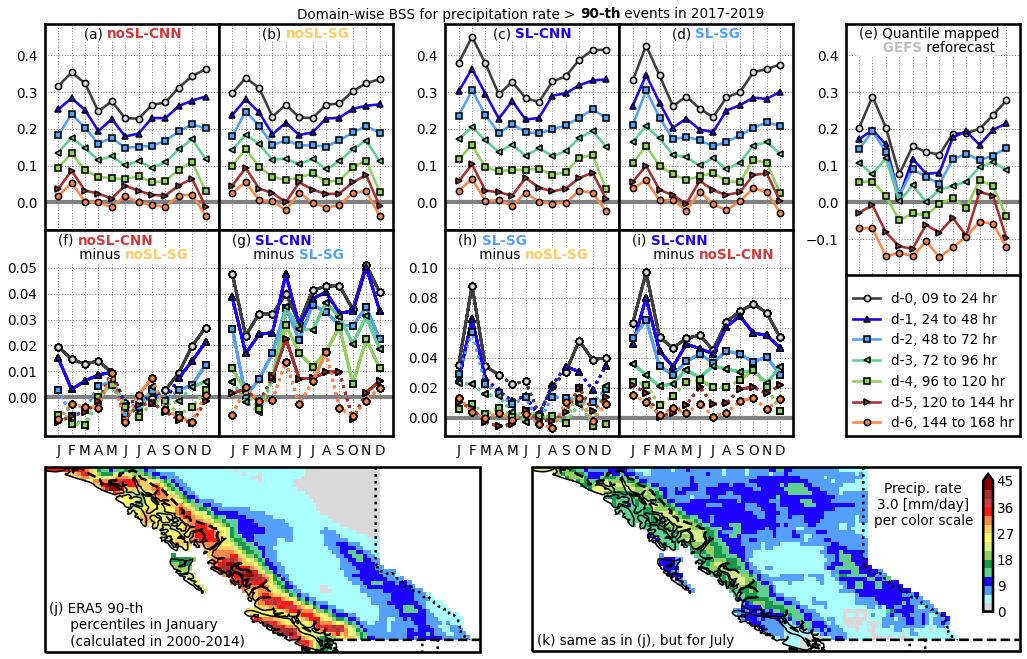

In [15]:
YLIM = [[-0.075, 0.485], ]
YLIM_gfs = [[-0.2, 0.485], ]
YLIM_diff1 = [[-0.015, 0.0645],]
YLIM_diff2 = [[-0.0125, 0.1250],]

labels = ['d-0, 09 to 24 hr', 
          'd-1, 24 to 48 hr', 
          'd-2, 48 to 72 hr', 
          'd-3, 72 to 96 hr', 
          'd-4, 96 to 120 hr', 
          'd-5, 120 to 144 hr',
          'd-6, 144 to 168 hr']

h_ratio = np.array([1, 1])
w_ratio = np.array([1, 1, 0.3, 1, 1, 0.3, 1])

fig = plt.figure(figsize=(13, 5.5), dpi=dpi_)
gs = gridspec.GridSpec(2, 7, height_ratios=h_ratio, width_ratios=w_ratio)

ax00 = plt.subplot(gs[0, 0]); ax01 = plt.subplot(gs[0, 1]); ax02 = plt.subplot(gs[0, 3]); ax03 = plt.subplot(gs[0, 4]);
ax10 = plt.subplot(gs[1, 0]); ax11 = plt.subplot(gs[1, 1]); ax12 = plt.subplot(gs[1, 3]); ax13 = plt.subplot(gs[1, 4]);
plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

AX0 = [ax00, ax01, ax02, ax03]; AX1 = [ax10, ax11, ax12, ax13]
AX_left = [ax00, ax02, ax10, ax12]
AX_bottom = [ax10, ax11, ax12, ax13]

AX_bss = [AX0,]
AX_diff = [AX1,]

wx = 1.0/w_ratio.sum()
dx = 4.6/w_ratio.sum()
hx = 1.0/h_ratio.sum()
locx = [1.0,]

AX_gfs = []
i = 0
h_ = hx*(YLIM_gfs[i][1]-YLIM_gfs[i][0])/(YLIM[i][1]-YLIM[i][0]) 
AX_gfs.append(fig.add_axes([dx, locx[i]-h_, wx, h_]))

AX_all = AX0 + AX1 + AX_gfs
AX_left += AX_gfs
#AX_bottom += AX_gfs

for i, ax in enumerate(AX_all):
    ax = gu.ax_decorate_box(ax)
    
    ax.xaxis.set_tick_params(labelsize=fontsize)
    ax.yaxis.set_tick_params(labelsize=fontsize)
    
    ax.grid(linewidth=1.0, linestyle=':', color='0.5')
    ax.set_xlim([-1, 12])
    ax.set_xticks(fake_x)
    ax.axhline(0, xmin=0, xmax=1.0, linewidth=4.0, linestyle='-', color='0.5', zorder=2)
    
for ax in AX_left:
    ax.tick_params(labelleft=True)

for ax in AX_bottom:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    
    
handle_title = []
handle_lines = []

precip_plot = ['90th',]
methods_plot = ['bcnn', 'base', 'scnn', 'sl']

methods_diff1 = ['bcnn', 'scnn', 'sl', 'scnn']
methods_diff2 = ['base', 'sl', 'base', 'bcnn']

fontsize_list = [fontsize,]*5
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal']

x_start0 = 0.225
y_start0 = 0.985

x_start1 = 0.075
y_start1 = 0.9825

dd = 0.07
handle_title += gu.string_partial_format(fig, ax00, x_start0, y_start0, 'left', 'top', 
                                         ['(a) ', 'noSL-CNN', ], ['k', red], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax01, x_start0+0.025, y_start0, 'left', 'top', 
                                         ['(b) ', 'noSL-SG', ], ['k', orange], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax02, x_start0+0.05, y_start0, 'left', 'top', 
                                         ['(c) ', 'SL-CNN', ], ['k', blue], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax03, x_start0+0.075, y_start0, 'left', 'top', 
                                         ['(d) ', 'SL-SG', ], ['k', cyan], fontsize_list, fontweight_list)

handle_title += gu.string_partial_format(fig, AX_gfs[0], x_start1, 1-(1-y_start1)*(hx/h_)+0.0025, 'left', 'top', 
                                         ['(e) Quantile mapped ',], ['k',], [fontsize,],  ['normal',])
handle_title += gu.string_partial_format(fig, AX_gfs[0], 
                                         x_start1, (1-(1-y_start1)*(hx/h_))-(dd*hx/h_)+0.0025, 'left', 'top', 
                                         ['     GEFS', ' reforecast'], [gray, 'k'], [fontsize,]*2,  ['bold', 'normal'])

handle_title += gu.string_partial_format(fig, ax10, x_start1, y_start1, 'left', 'top', 
                                         ['(f) ', 'noSL-CNN', ], ['k', red], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax10, x_start1, y_start1-dd, 'left', 'top', 
                                         ['     minus ', 'noSL-SG'], ['k', orange], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax11, x_start1, y_start1, 'left', 'top', 
                                         ['(g) ', 'SL-CNN'], ['k', blue], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax11, x_start1, y_start1-dd, 'left', 'top', 
                                         ['     minus ', 'SL-SG'], ['k', cyan], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax12, x_start1, y_start1, 'left', 'top', 
                                         ['(h) ', 'SL-SG'], ['k', cyan,], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax12, x_start1, y_start1-dd, 'left', 'top', 
                                         ['     minus ', 'noSL-SG'], ['k', orange], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax13, x_start1, y_start1, 'left', 'top', 
                                         ['(i) ', 'SL-CNN'], ['k', blue], fontsize_list, fontweight_list)
handle_title += gu.string_partial_format(fig, ax13, x_start1, y_start1-dd, 'left', 'top', 
                                         ['     minus ', 'noSL-CNN'], ['k', red], fontsize_list, fontweight_list)

# BSS and diff curves
for p, precip in enumerate(precip_plot):

    AX_bss[p][0].set_ylim(YLIM[p])
    AX_bss[p][1].set_ylim(YLIM[p])
    AX_bss[p][2].set_ylim(YLIM[p])
    AX_bss[p][3].set_ylim(YLIM[p])

    AX_diff[p][0].set_ylim(YLIM_diff1[p])
    AX_diff[p][1].set_ylim(YLIM_diff1[p])
    AX_diff[p][2].set_ylim(YLIM_diff2[p])
    AX_diff[p][3].set_ylim(YLIM_diff2[p])

    AX_gfs[p].set_ylim(YLIM_gfs[p])
    
    for d in range(7):
        handle_lines += AX_gfs[p].plot(fake_x, BSS_dict['{}_{}'.format(precip, 'gfs')][:, d], linewidth=2.5, 
                       linestyle=LS[d], color=C[d], marker=M[d], mfc=C_M[d], ms=6, mec='k', mew=1.5, label=labels[d])

    for m, method in enumerate(methods_plot):
        
        for d in range(7):
            AX_bss[p][m].plot(fake_x, BSS_dict['{}_{}'.format(precip, method)][:, d], linewidth=2.5, 
                              linestyle=LS[d], color=C[d], marker=M[d], mfc=C_M[d], ms=6, mec='k', mew=1.5)
            
            diff_temp = BSS_dict['{}_{}'.format(precip, methods_diff1[m])]-BSS_dict['{}_{}'.format(precip, methods_diff2[m])]
            diff_p = BSS_wilcox['{}_{}_{}'.format(methods_diff1[m], methods_diff2[m], precip)]
            
            diff_temp_sig = np.copy(diff_temp)
            diff_temp_sig[diff_p>0.01] = np.nan
            diff_temp_sig[diff_temp<0.0002] = np.nan
            
            for d in range(7):
                AX_diff[p][m].plot(fake_x, diff_temp[:, d], linewidth=2.5, 
                                   linestyle=':', color=C[d], marker=M[d], mfc=C_M[d], ms=6, mec='k', mew=1.5)
                AX_diff[p][m].plot(fake_x, diff_temp_sig[:, d], linewidth=2.5, 
                                   linestyle='-', color=C[d], marker=M[d], mfc=C_M[d], ms=6, mec='k', mew=1.5)

for i in range(4):
    AX_bss[0][i].set_yticks([0, 0.1, 0.2, 0.3, 0.4,])

for i in [0, 1]:
    AX_diff[0][i].set_yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05,]);

for i in [2, 3]:
    AX_diff[0][i].set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.10]);

AX_gfs[0].set_yticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4,]);

ax_t1 = fig.add_axes([0.5*(5.6-2.7)/5.6, 1.0, (2.7/5.6), 0.04])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Domain-wise BSS for precipitation rate > ', '90-th', 
                                          ' events in 2017-2019'], 
                                         ['k',]*3, fontsize_list, ['normal', 'bold', 'normal'])

ax_lg1 = fig.add_axes([4.6/5.6, 0, 1/5.6, 0.39])
ax_lg1 = gu.ax_decorate_box(ax_lg1)
LG1 = ax_lg1.legend(handles=handle_lines[:7], bbox_to_anchor=(1.035, 0.975), 
                    ncol=1, prop={'size':fontsize}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

# ----------------------------------------------------------------- #
# Map of 90th percentile

VLIM = [0, 9*5]
AX_map = []

edge_bc = [-141-0.1, -113.25-0.1, 48.25, 60]
r_bc = aspc_cal(edge_bc)
w_map = 2.5/5.6
h_map = w_map*13/5.5*r_bc

#scale the second frame based on the first frame
gap = 0.3/5.6
w_map2 = 2.8/5.6

r_bc2 = h_map/w_map2/13*5.5
edge_bc2 = [-141-0.1, -141+(60-48.25)/r_bc2-0.1, 48.25, 60]

EDGE = [edge_bc, edge_bc2]

AX_map.append(fig.add_axes([0, -h_map-0.075, w_map, h_map], projection=ccrs.PlateCarree()))
AX_map.append(fig.add_axes([w_map+gap, -h_map-0.075, w_map2, h_map], projection=ccrs.PlateCarree()))

titles = ['(j) ERA5 90-th\n     percentiles in January\n     (calculated in 2000-2014)',
          '(k) same as in (j), but for July']

handle_text_title = []
yw = [0.02]*2

for n, ax in enumerate(AX_map):
    ax.set_extent(EDGE[n], ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=1.5)
    ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=2.5)
    ax.add_feature(PROVINCE, edgecolor='k', linestyle=':', linewidth=2.5)
    ax.spines['geo'].set_linewidth(2.5)
    handle_text_title.append(ax.text(0.01, yw[n], titles[n], ha='left', va='bottom', 
                                     fontsize=fontsize, transform=ax.transAxes, zorder=5))
    
CS = AX_map[0].pcolormesh(bc_lon, bc_lat, 8*CDF_era[0, 93, ...], vmin=VLIM[0], vmax=VLIM[1], cmap=cmap_pct)
AX_map[1].pcolormesh(bc_lon, bc_lat, 8*CDF_era[6, 93, ...], vmin=VLIM[0], vmax=VLIM[1], cmap=cmap_pct)

ax_base = fig.add_axes([0.9625, -0.425, 0.02, 1/3])
[j.set_linewidth(0) for j in ax_base.spines.values()]
ax_base.tick_params(axis='both', left=False, top=False, right=False, bottom=False, \
                    labelleft=False, labeltop=False, labelright=False, labelbottom=False)
cax = inset_axes(ax_base, height='100%', width='50%', borderpad=0, loc=2)
CBar = plt.colorbar(CS, orientation='vertical', ticks=[0, 9, 18, 27, 36, 45], extend='max', cax=cax)
CBar.ax.tick_params(axis='y', labelsize=fontsize, direction='in', length=0)
CBar.outline.set_linewidth(2.5)

ax_m = fig.add_axes([0.8485, -0.21, 0.105, 0.1])
ax_m.set_axis_off()
ax_m.text(0.5, 1, 'Precip. rate\n3.0 [mm/day]\nper color scale', 
          ha='center', va='top', fontsize=fontsize, transform=ax_m.transAxes);

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0.5, edgecolor='none', zorder=2))
    
if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_90th_BSS.png', format='png', **fig_keys)